In [1]:
from pylab import *
%matplotlib inline

In [4]:
def rk4(ec,p_ini,x,args=0,h=0.01):
    if (x[1]-x[0]) <= 5.*h:
        h = (x[1]-x[0])/10
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

In [28]:
def ec_mov(x_p,t,a=0):
    #x_p representa x,y,px,py
    r3_2 = (x_p[0]**2 + x_p[1]**2)**(1.5)
    desv = 1.+a
    dx = x_p[2]*desv
    dy = x_p[3]
    dpx = - (x_p[0]*desv)/r3_2
    dpy = -(x_p[1]*desv)/r3_2
    return array([dx,dy,dpx,dpy])

In [50]:
t,sol = rk4(ec_mov,[1,0,0,0.5],[0,30],0.05,0.0001)

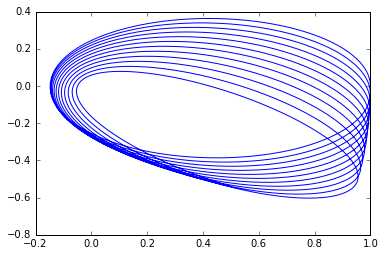

In [51]:
plot(sol[:,0],sol[:,1])
show()

In [52]:
def energia(x_p,a):
    x,y,px,py =x_p[:,0],x_p[:,1],x_p[:,2],x_p[:,3]
    E = (0.5)*((px**2)*(1+a) + py**2) - ((1+a)/sqrt(x**2 + y**2))
    return E

In [53]:
E = energia(sol,0.05)

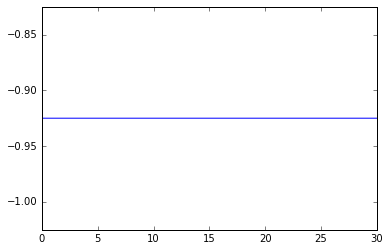

In [57]:
plot(t,E)
ylim(E[0]-.1,E[0]+.1)
show()